# Exercise 7

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository. The project must be carried out in the groups assigned in class. Use clear and rigorous procedures. Due date: July 18, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
plt.style.use('seaborn-whitegrid')
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



 



In [2]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('../datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

The previous code tells us that in general, the number of total bike rentals is higher during workingdays.

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

The number of bike rentals is higher at 5pm and 6pm

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

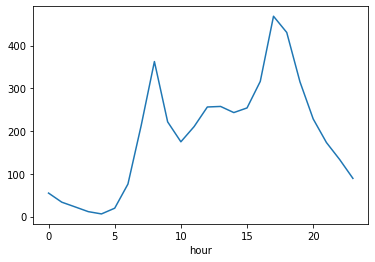

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

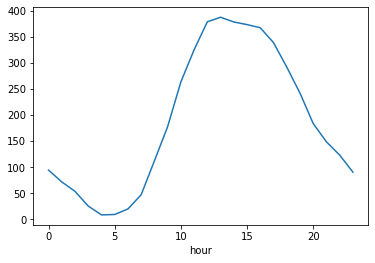

In [11]:
# hourly rental trend for "workingday=0"
bikes[bikes['workingday'] == 0].groupby('hour').total.mean().plot()

On weekends, the bikes are rentend accross all hours

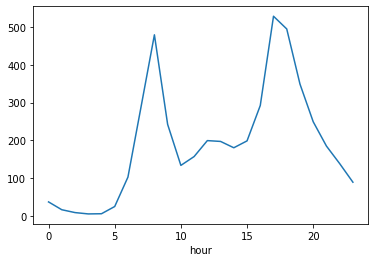

In [12]:
# hourly rental trend for "workingday=1"
bikes[bikes['workingday'] == 1].groupby('hour').total.mean().plot()

The bikes on working days are rented in the morning and in the afternoon when the people goes to work and return home.

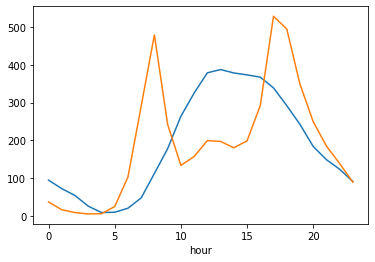

In [13]:
# combine the two plots
bikes[bikes['workingday'] == 0].groupby('hour').total.mean().plot()
bikes[bikes['workingday'] == 1].groupby('hour').total.mean().plot()

Write about your findings

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [16]:
clf = LinearRegression()
clf.fit(bikes[["workingday", "hour"]], bikes[["total"]])

LinearRegression()

In [17]:
clf.coef_

array([[ 4.07248627, 10.49206282]])

The first coefficient tells us that the number of rentals increases 4 units in working days and that it increases 10 units for every hour that has passed on the day.

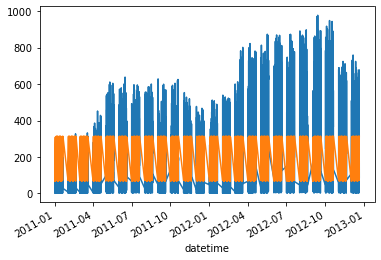

In [29]:
bikes.total.plot()
pd.DataFrame(clf.predict(bikes[["workingday", "hour"]]), index=bikes.index)[0].plot()

The LinearRegression model doesn't take into account the change in variance accross the time

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [74]:
class DecisionTreeRegression():
    """
    Class to grow a regression decision tree
    """
    def __init__(
        self,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        node_type=None,
        rule=None
    ):
       
        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Default current depth of node 
        self.depth = depth if depth else 0

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else ""

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 

    @staticmethod
    def get_mse(ytrue, yhat) -> float:
        """
        Method to calculate the mean squared error 
        """
        # Getting the total number of samples
        n = len(ytrue)

        # Getting the residuals 
        r = ytrue - yhat 

        # Squering the residuals 
        r = r ** 2

        # Suming 
        r = np.sum(r)

        # Getting the average and returning 
        return r / n

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the mse for the base input 
        mse_base = self.mse

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Getting the left and right ys 
                left_y = Xdf[Xdf[feature]<value]['Y'].values
                right_y = Xdf[Xdf[feature]>=value]['Y'].values

                # Getting the means 
                left_mean = np.mean(left_y)
                right_mean = np.mean(right_y)

                # Getting the left and right residuals 
                res_left = left_y - left_mean 
                res_right = right_y - right_mean

                # Concatenating the residuals 
                r = np.concatenate((res_left, res_right), axis=None)

                # Calculating the mse 
                n = len(r)
                r = r ** 2
                r = np.sum(r)
                mse_split = r / n

                # Checking if this is the best split so far 
                if mse_split < mse_base:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    mse_base = mse_split

        return (best_feature, best_value)

    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is mse to be reduced, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node 
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = DecisionTreeRegression(
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )
                self.left = left 
                self.left.fit(left_df[self.features], left_df['Y'])

                right = DecisionTreeRegression(
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )
                self.right = right
                self.right.fit(right_df[self.features], right_df['Y'])

    def fit(self, X, y):
        # Saving the data to the node 
        self.Y = y 
        self.X = X
        
        # Extracting all the features
        self.features = list(self.X.columns)
        
        # Getting the mean of Y 
        self.ymean = np.mean(self.Y.values)

        # Getting the residuals 
        self.residuals = self.Y - self.ymean

        # Calculating the mse of the node 
        self.mse = self.get_mse(self.Y.values, self.ymean)

        # Saving the number of observations in the node 
        self.n = len(self.Y)
        self.grow_tree()
        
    
    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | MSE of the node: {round(self.mse, 2)}")
        print(f"{' ' * const}   | Count of observations in node: {self.n}")
        print(f"{' ' * const}   | Prediction of node: {round(self.ymean, 3)}")   

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()
    
    def predict_row(self, X):
        if self.best_feature is None:
            return self.ymean
        if X[self.best_feature] <= self.best_value:
            return self.left.predict_row(X)
        else:
            return self.right.predict_row(X)
    
    def predict(self, X):
        return X.apply(lambda x: self.predict_row(x), axis=1)
        

In [82]:
tree = DecisionTreeRegression(max_depth=100)
tree.fit(bikes[["workingday", "hour"]], bikes[["total"]])

E:\Users\juanb\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\Users\juanb\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-74-da8c08698ac1>:53: RuntimeWarning: invalid value encountered in double_scalars
  return r / n


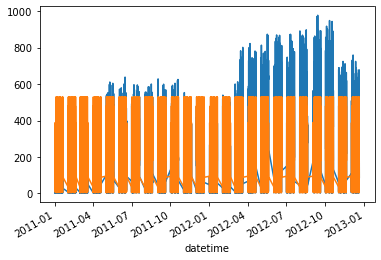

In [83]:
bikes.total.plot()
tree.predict(bikes[["workingday", "hour"]]).plot()

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [31]:
clf2 = DecisionTreeRegressor()
clf2.fit(bikes[["workingday", "hour"]], bikes[["total"]])

DecisionTreeRegressor()

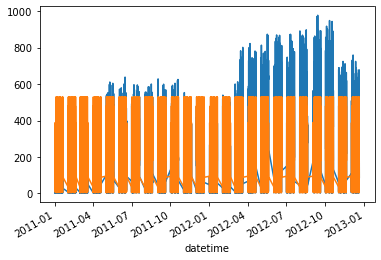

In [32]:
bikes.total.plot()
pd.DataFrame(clf2.predict(bikes[["workingday", "hour"]]), index=bikes.index)[0].plot()

In [84]:
print("Decicison Tree:", clf2.score(bikes[["workingday", "hour"]], bikes[["total"]]))
print("Manual Decision Tree:", r2_score(bikes.total, tree.predict(bikes[["workingday", "hour"]])))
print("Linear Regression:", clf.score(bikes[["workingday", "hour"]], bikes[["total"]]))

Decicison Tree: 0.6547025809438785
Manual Decision Tree: 0.6547025809438785
Linear Regression: 0.16059115011434855


We see that the Manual implementation and the Sklearn one have the same r2 score which is higher than the Regression model.

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [10]:
dfp6 = pd.read_csv('C:/Users/USER/Desktop/Andrea !NO TOCAR¡/Punto 7/mashable.csv', index_col=0)
dfp6.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [11]:
dfp6.shape

(6000, 61)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [12]:
X = dfp6.drop(['url', 'Popular'], axis=1)
y = dfp6['Popular']

In [7]:
y.mean()

0.5

In [15]:
dfp6.shape
from sklearn.model_selection import train_test_split
Xp6 = dfp6.drop(['url', 'Popular'], axis=1)
yp6 = dfp6['Popular']

yp6.mean()

# train/test split
X_trainp6, X_testp6, y_trainp6, y_testp6 = train_test_split(Xp6, yp6, random_state=1)

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_trainp6,y_trainp6)
#Predict the response for test dataset
y_predp6 = clf.predict(X_testp6)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testp6, y_predp6))
print("F1score:",metrics.f1_score(y_predp6, y_testp6.values))

Accuracy: 0.5386666666666666
F1score: 0.5305291723202171


In [21]:
#regresión logística
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_trainp6,y_trainp6)
y_predlog=logreg.predict(X_testp6)

cnf_matrix = metrics.confusion_matrix(y_testp6, y_predlog)
cnf_matrix


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[467, 277],
       [302, 454]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

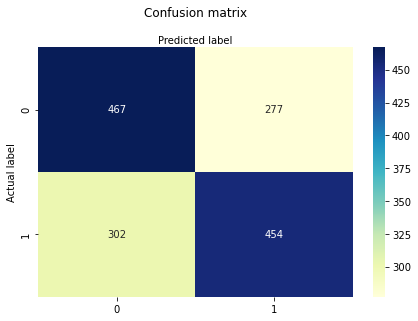

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [23]:
print("Accuracy:",metrics.accuracy_score(y_testp6, y_predlog))
print("F1score:",metrics.f1_score(y_predlog, y_testp6.values))


Accuracy: 0.614
F1score: 0.6106254203093476


# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [25]:
# remove rows with missing values
dfp6.dropna(inplace=True)
dfp6.head()
rfclf = RandomForestClassifier()
rfclf

RandomForestClassifier()

In [27]:
pd.Series(cross_val_score(rfclf, Xp6, yp6, cv=10)).describe()

count    10.000000
mean      0.650833
std       0.018312
min       0.628333
25%       0.637917
50%       0.648333
75%       0.666250
max       0.678333
dtype: float64

In [28]:
#con 300 arboles
# list of values to try for n_estimators
estimator_range = range(10, 500, 20)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
      
    frclf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(rfclf, Xp6, yp6, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

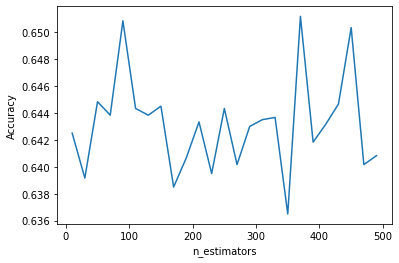

In [29]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [30]:
# Fitting a Random Forest
rfclf = RandomForestClassifier(n_estimators=300, max_features=3, random_state=1, n_jobs=-1)
rfclf.fit(Xp6, yp6)

RandomForestClassifier(max_features=3, n_estimators=300, n_jobs=-1,
                       random_state=1)

In [31]:
#con 100 arboles y max_depth=None
rfclf2 = RandomForestClassifier()
rfclf2 = RandomForestClassifier(n_estimators=100, max_features=3, random_state=1, n_jobs=-1, max_depth=None)
rfclf2.fit(Xp6, yp6)


RandomForestClassifier(max_features=3, n_jobs=-1, random_state=1)

In [32]:
#con 100 arboles y max_depth=2
rfclf3 = RandomForestClassifier()
rfclf3 = RandomForestClassifier(n_estimators=100, max_features=3, random_state=1, n_jobs=-1, max_depth=2)
rfclf3.fit(Xp6, yp6)

RandomForestClassifier(max_depth=2, max_features=3, n_jobs=-1, random_state=1)

# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [33]:
n_samples = X_trainp6.shape[0]
n_estimators = 10
weights = pd.DataFrame(index=X_trainp6.index, columns=list(range(n_estimators)))
t = 0
weights[t] = 1 / n_samples
weights.head()

,0,1,2,3,4,5,6,7,8,9
2420,0.000222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,0.000222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,0.000222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5863,0.000222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,0.000222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
trees = []
trees.append(DecisionTreeClassifier(max_depth=1))
trees[t].fit(X_trainp6, y_trainp6, sample_weight=weights[t].values)

DecisionTreeClassifier(max_depth=1)

In [44]:
y_pred_p8 = trees[t].predict(X_trainp6)
error = []
error.append(1 - metrics.balanced_accuracy_score(y_pred_p8, y_trainp6, weights[t].values))
error[t]

0.3673165804481662

In [36]:
alpha = []
alpha.append(np.log((1 - error[t]) / error[t])/2)
alpha[t]

0.27187303835464843

In [37]:
#usando skt learn
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier()
adaclf

AdaBoostClassifier()

In [38]:
adaclf.fit(X_trainp6, y_trainp6)
y_pred_p82 = adaclf.predict(X_testp6)
metrics.f1_score(y_pred_p82, y_testp6.values), metrics.accuracy_score(y_pred_p82, y_testp6.values)

(0.6486129458388376, 0.6453333333333333)

# Exercise 7.9

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [50]:

y_predp6=pd.DataFrame(y_predp6)
y_predp6.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,,
0,782,0.521333
1,718,0.478667


In [53]:
y_predlog=pd.DataFrame(y_predlog)
y_predlog.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,,
0,769,0.512667
1,731,0.487333


In [51]:

y_pred_p8=pd.DataFrame(y_pred_p8)
y_pred_p8.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,,
0,2289,0.508667
1,2211,0.491333


In [52]:

y_pred_p82=pd.DataFrame(y_pred_p82)
y_pred_p82.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,,
1,758,0.505333
0,742,0.494667


# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [97]:

## max_depth=None

seed=np.random.seed(1328)
n_samples = X_trainp6.shape[0]
n_B = 100

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None, random_state=789), 
                        n_estimators=n_B, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)

clf.fit(X_trainp6, y_trainp6)
y_pred_10_1 = clf.predict(X_testp6)



errors = np.zeros(clf.n_estimators)
y_pred_all_2 = np.zeros((X_testp6.shape[0], clf2.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_10 = clf.estimators_[i].predict(X_trainp6.values[oob_sample])
    y_pred_all_2[:, i] = clf.estimators_[i].predict(X_testp6)
    
threshold = 0.5
alpha = (1 - errors) / (1 - errors).sum()
y_pred_10_2 = (np.sum(y_pred_all_2 * alpha, axis=1) >= threshold).astype(np.int)
y_pred_10_2 = pd.DataFrame(y_pred_10_2)


print("Accuracy:",metrics.accuracy_score(y_testp6, y_pred_10_2))
print("F1 score:",metrics.f1_score(y_testp6, y_pred_10_2))

Accuracy: 0.6466666666666666
F1 score: 0.6531413612565445


In [88]:

##max_depth=2

seed=np.random.seed(1328)
n_samples = X_trainp6.shape[0]
n_B = 100

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, random_state=789), 
                        n_estimators=n_B, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)

clf.fit(X_trainp6, y_trainp6)
y_pred_10_1 = clf.predict(X_testp6)


errors = np.zeros(clf.n_estimators)
y_pred_all_2 = np.zeros((X_testp6.shape[0], clf2.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_10 = clf.estimators_[i].predict(X_trainp6.values[oob_sample])
    y_pred_all_2[:, i] = clf.estimators_[i].predict(X_testp6)
    
threshold = 0.5
alpha = (1 - errors) / (1 - errors).sum()
y_pred_10_3 = (np.sum(y_pred_all_2 * alpha, axis=1) >= threshold).astype(np.int)
y_pred_10_3 = pd.DataFrame(y_pred_10_3)


print("Accuracy:",metrics.accuracy_score(y_testp6, y_pred_10_3))
print("F1 score:",metrics.f1_score(y_testp6, y_pred_10_3))

Accuracy: 0.6453333333333333
F1 score: 0.6448598130841121


In [93]:
#logistic regression

seed=np.random.seed(1328)
n_samples = X_trainp6.shape[0]
n_B = 100

# grow each tree deep
clf = BaggingClassifier(base_estimator=LogisticRegression(), 
                        n_estimators=n_B, bootstrap=True,
                        random_state=seed, n_jobs=-1, oob_score=True)

clf.fit(X_trainp6, y_trainp6)
y_pred_10_4 = clf.predict(X_testp6)


print("Accuracy:",metrics.accuracy_score(y_testp6, y_pred_10_4))
print("F1 score:",metrics.f1_score(y_testp6, y_pred_10_4))



Accuracy: 0.62
F1 score: 0.6169354838709677


# Exercise 7.11

Estimate the probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [98]:

#treshhols with first model

threshold = 0
f1_score = []

for threshold in range(1,101,1):
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred_10_2 = (np.sum(y_pred_all_2 * alpha, axis=1) >= threshold/100).astype(np.int)
    y_pred_10_22 = pd.DataFrame(y_pred_10_2)
    f1_score.append(metrics.f1_score(y_testp6, y_pred_10_22))



# max f1_score and threshold
print("threshold:",f1_score.index(max(f1_score)),"%")
print("f1_score:", max(f1_score))

threshold: 38 %
f1_score: 0.7082429501084598


# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [99]:
from sklearn.linear_model import LogisticRegressionCV

In [105]:
#X_trainp6, X_testp6, y_trainp6, y_testp6 = train_test_split(Xp6, yp6, random_state=1)


lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_trainp6, y_trainp6)

y_pred_df = (np.sum(y_pred_all_2 * alpha, axis=1) >= threshold/100).astype(np.int)
y_pred_df = pd.DataFrame(y_pred_df)
lr.coef_


array([[-6.76956561e-04, -1.77384407e-05,  1.33378448e-04,
        -1.14167595e-06, -1.90625922e-06, -1.47464058e-06,
         2.68785301e-05, -4.60880638e-06,  3.14992675e-05,
         4.77079621e-06, -9.63209566e-06, -7.56582619e-06,
         9.90512095e-08, -8.67345963e-07, -1.06475561e-06,
         2.55476998e-07,  7.78013204e-07, -1.82800776e-06,
        -3.88516014e-04,  2.52795971e-05, -3.85969902e-04,
        -6.27260017e-07, -1.77066169e-06, -8.98427735e-07,
        -9.88799250e-05, -7.17647223e-05,  7.18275783e-04,
         6.69397520e-06,  1.61531400e-06, -1.38838829e-06,
        -8.38003321e-08, -8.27867009e-07, -7.90504502e-07,
        -2.61324281e-07, -5.92671414e-07,  1.14661546e-07,
         7.53667672e-07,  8.68329218e-07, -2.17607485e-07,
        -6.58436804e-07, -1.60395800e-06,  6.23966709e-07,
         1.68197260e-07, -5.75644359e-07, -1.76463340e-07,
        -5.28475518e-08, -3.56672157e-08, -1.18021535e-06,
        -7.26043882e-07, -7.00060306e-07, -2.59083210e-0

In [108]:

y_pred_all_ = np.zeros((X_testp6.shape[0], clf.n_estimators))
X_train_3 = np.zeros((X_trainp6.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):

    X_train_3[:, i] = clf.estimators_[i].predict(X_trainp6)
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_testp6)
    
lr = LogisticRegressionCV(cv=5)
lr.fit(X_train_3, y_trainp6)

y_pred = lr.predict(y_pred_all_)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6475300400534045, 0.648)